This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards
679,680,2021-04-13 23:38:24.435000,4,267.403,event_only_jump_club_1204_to_1404_2021,False,3,Infallible Laughing Penguin,1,04:42:51.838,180,0,0,43.0
680,681,2021-04-13 23:43:48.824000,4,594.640,event_only_jump_club_1204_to_1404_2021,True,4,Infallible Laughing Penguin,1,04:53:43.464,1000,0,1,43.0
681,682,2021-04-14 09:44:35.194000,4,621.928,event_only_jump_club_1204_to_1404_2021,True,4,Infallible Laughing Penguin,1,14:54:57.122,1000,0,1,45.0
682,683,2021-04-14 09:56:23.037000,4,372.600,event_only_jump_club_1204_to_1404_2021,True,4,Infallible Laughing Penguin,1,15:02:35.043,265,0,0,1.0
683,684,2021-04-14 10:04:30.161000,4,425.858,squads_4player,False,3,Infallible Laughing Penguin,1,15:11:36.019,215,0,0,1.0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2200,682,1,round_jump_club_event_only_02,27.589,27.594,True,2,20,0,0.0,35,0,gold,24,75,18.0,NaN,18.0,False,8.33
2201,682,2,round_jump_club_event_only_03,37.120,37.125,True,10,60,0,0.0,35,0,gold,17,65,11.0,NaN,11.0,False,58.82
2202,682,3,round_jump_showdown_jump_club_event_only_final,300.560,300.57,True,2,750,0,0.0,35,0,gold,11,0,0.0,NaN,2.0,True,18.18
2203,683,0,round_jump_club_event_only_01,36.580,36.63,True,24,30,0,0.0,35,0,gold,30,80,24.0,NaN,24.0,False,80.00
2204,683,1,round_jump_club_event_only_02,35.508,35.513,True,2,20,0,0.0,35,0,gold,23,75,18.0,NaN,18.0,False,8.70
2205,683,2,round_jump_club_event_only_03,41.872,41.876,True,10,60,0,0.0,35,0,gold,18,65,12.0,NaN,12.0,False,55.56
2206,683,3,round_jump_showdown_jump_club_event_only_final,68.855,uncertain,False,9,50,0,3.0,0,0,NaN,12,0,0.0,NaN,0.0,False,75.00
2207,684,0,round_door_dash_squads,45.386,51.451,True,10,30,0,1.0,70,0,silver,60,100,58.0,122.0,57.0,False,16.67
2208,684,1,round_gauntlet_04_squads,60.870,120.19,True,10,20,0,2.0,35,0,bronze,38,100,30.0,80.0,30.0,False,26.32
2209,684,2,round_snowballsurvival_squads,25.603,60.26,False,23,60,0,3.0,0,0,NaN,23,0,0.0,125.0,13.0,False,100.00


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,106,95,89.622642,8.783019,7.747368,39.011684,41.069832,14.903,41.075474,6505,1740,61.367925,16.415094,NaN,95,0,0,0.311321
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,95,78,82.105263,5.978947,4.769231,32.352949,65.088449,48.504,65.094564,4630,1276,48.736842,13.431579,NaN,78,0,0,0.536842
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.000000,11.283750,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,72,67,93.055556,11.708333,10.611940,35.395224,36.734851,26.872,36.755209,4505,474,62.569444,6.583333,NaN,67,0,0,0.208333
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,67,64,95.522388,10.522388,10.046875,43.345937,34.249141,24.956,34.279953,3580,306,53.432836,4.567164,NaN,64,0,0,0.134328
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,64,54,84.375000,6.218750,4.944444,28.827037,39.601667,28.399,39.599630,5730,266,89.531250,4.156250,NaN,54,0,0,0.468750
round_biggestfan,Big Fans,Race,63,63,100.000000,8.507937,8.507937,17.313968,83.560730,55.290,176.656206,5440,2726,86.349206,43.269841,NaN,3,43,15,1.253968
round_thin_ice_event_only_01,Thin Ice (Thin Ice Trials),Survival,55,51,92.727273,9.709091,9.078431,46.093725,37.363157,18.158,37.380275,3435,0,62.454545,0.000000,NaN,51,0,0,0.218182
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,54,6,11.111111,4.833333,1.166667,10.528333,226.903667,139.286,226.909833,7110,140,131.666667,2.592593,NaN,6,0,0,2.666667
round_thin_ice_event_only_02,Thin Ice (Thin Ice Trials),Survival,51,43,84.313725,5.568627,4.511628,31.208605,67.638000,32.418,67.618279,2525,0,49.509804,0.000000,NaN,43,0,0,0.470588


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,684,615,89.912281
2,615,508,82.601626
3,382,284,74.345550
4,210,129,61.428571
5,15,5,33.333333
final,304,38,12.500000


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,318,23,206,389.181107,3.163522,265.235849,64.427673,64.779874,7.547170,34.377664,85.944161
4,249,8,92,432.273791,2.987952,239.718876,96.867470,36.947791,3.212851,29.898937,224.242029
total,684,39,345,440.596697,3.230994,272.295322,91.552632,50.438596,5.847953,83.713373,125.570059


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df, rounds_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:419: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,237,18,105,586.194962,3.949367,365.569620,163.898734,44.303797,8.016878,38.591168,121.866847
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Squad Mode Stats

In [8]:
squad_shows_df, squad_rounds_df = getSquadDataFrames(shows_df, rounds_df)
squad_shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards,Wins
635,636,2021-04-09 22:42:46.756000,4,240.737,squads_4player,False,2,Infallible Laughing Penguin,na,03:46:47.493,120,0,0,4.0,0
636,637,2021-04-08 22:47:49.028000,4,777.446,squads_4player,True,5,Infallible Laughing Penguin,na,04:00:46.474,440,0,0,6.0,0
637,638,2021-04-09 23:02:26.723000,4,171.769,squads_4player,False,1,Infallible Laughing Penguin,na,04:05:18.492,30,0,0,12.0,0
638,639,2021-04-09 23:07:36.894000,4,441.240,squads_4player,False,3,Infallible Laughing Penguin,na,04:14:57.918,250,0,0,12.0,0
683,684,2021-04-14 10:04:30.161000,4,425.858,squads_4player,False,3,Infallible Laughing Penguin,1,15:11:36.019,215,0,0,1.0,0


In [9]:
squad_rounds_df.tail()

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2060,639,1,round_jump_club_squads,83.288,90.29,True,8,20,0,0.0,35,0,gold,28,0,0.0,267.0,NaN,NaN,28.57
2061,639,2,round_iceclimb_squads,55.236,113.819,False,12,60,0,3.0,0,0,NaN,16,100,16.0,30.0,NaN,NaN,75.00
2207,684,0,round_door_dash_squads,45.386,51.451,True,10,30,0,1.0,70,0,silver,60,100,58.0,122.0,57.0,False,16.67
2208,684,1,round_gauntlet_04_squads,60.870,120.19,True,10,20,0,2.0,35,0,bronze,38,100,30.0,80.0,30.0,False,26.32
2209,684,2,round_snowballsurvival_squads,25.603,60.26,False,23,60,0,3.0,0,0,NaN,23,0,0.0,125.0,13.0,False,100.00


# Other

In [10]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.000000,11.283750,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,54,6,11.111111,4.833333,1.166667,10.528333,226.903667,139.286,226.909833,7110,140,131.666667,2.592593,NaN,6,0,0,2.666667
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,43,5,11.627907,4.465116,1.000000,11.110000,159.520400,134.553,159.522800,6255,0,145.465116,0.000000,NaN,5,0,0,2.651163
round_floor_fall,Hex-A-Gone,Final,38,2,5.263158,3.947368,1.000000,8.330000,106.807000,92.734,106.818000,4120,1086,108.421053,28.578947,NaN,2,0,0,2.842105
round_jump_showdown,Jump Showdown,Final,30,4,13.333333,5.100000,1.000000,9.820000,187.000750,142.522,187.005500,4990,1497,166.333333,49.900000,NaN,4,0,0,2.600000
round_fall_mountain_hub_complete,Fall Mountain,Final,26,8,30.769231,4.038462,1.000000,11.215000,38.614250,35.305,35.556250,7640,2148,293.846154,82.615385,NaN,8,0,0,2.076923
round_thin_ice,Thin Ice,Final,17,3,17.647059,4.588235,1.000000,9.443333,131.022333,105.602,131.025000,3365,889,197.941176,52.294118,NaN,3,0,0,2.470588
round_tunnel_final,Roll Off,Final,17,1,5.882353,4.058824,1.000000,11.110000,150.920000,150.920,150.922000,1875,380,110.294118,22.352941,NaN,1,0,0,2.823529
round_royal_rumble,Royal Fumble,Final,4,1,25.000000,4.000000,1.000000,16.670000,92.772000,92.772,90.400000,975,263,243.750000,65.750000,NaN,1,0,0,2.250000
round_lava_event_only_slime_climb_final,Slime Climb 1 (SCT),Final,4,1,25.000000,3.250000,1.000000,33.330000,57.970000,57.970,57.972000,1075,314,268.750000,78.500000,NaN,1,0,2,1.750000


In [11]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 67
round_jump_showdown_jump_club_event_only_final    48
round_thin_ice_event_only_final                   38
round_floor_fall                                  36
round_jump_showdown                               26
                                                  ..
round_tunnel_final_squads                          1
round_event_only_basketfall_02                     1
round_block_party_3_point_5_fan_favourite          1
round_lava_event_only_slime_climb_02               1
round_lava_event_only_slime_climb_03               1
Name: Map, Length: 98, dtype: int64

In [12]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN,NaN,NaN,20.00
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN,NaN,NaN,12.50
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN,NaN,NaN,7.69
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33


# Visuals

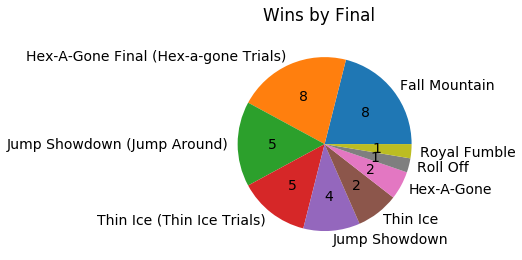

In [13]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        11
bronze        19
none           1
eliminated     9
Name: BadgeId, dtype: int64

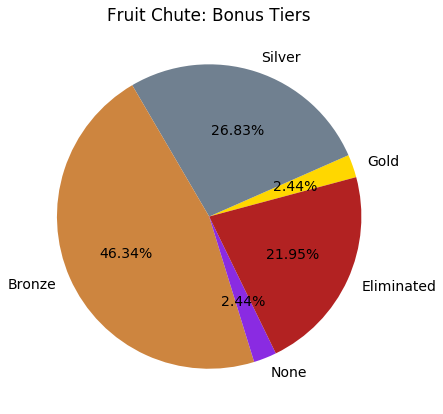

In [14]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                   17
event_only_thin_ice_1903_to_2203_2021        5
event_only_floor_fall_2302_to_2502_2021      5
event_only_jump_club_1204_to_1404_2021       4
event_only_jump_club_0603_to_0803_2021       2
event_only_floor_fall_1203_to_1403_2021      2
event_only_survival_0904_to_1104_2021        1
event_only_floor_fall_0501_to_0701           1
event_only_slime_climb_0504_to_0804_2021     1
Name: Game Mode, dtype: int64

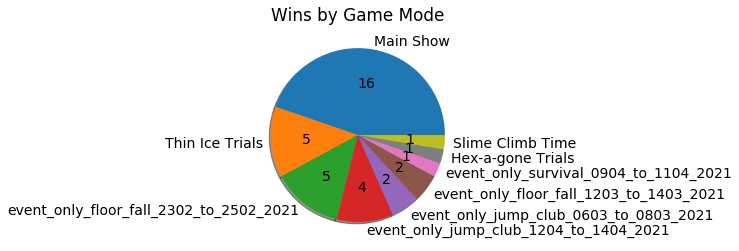

In [15]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [16]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          237
squads_4player_2203_to_0404_2021                    71
squads_4player                                      67
event_only_thin_ice_1903_to_2203_2021               55
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_1203_to_1403_2021             37
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_2302_to_2502_2021             32
event_only_jump_club_1204_to_1404_2021              22
event_only_survival_0904_to_1104_2021               22
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_only_slime_climb_0504_to_0804_2021             8
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_only_season_4_2203_to_2803_2021                3
event_only_survival_2501_to_0102_2021                3
event_only_season_3_variation_0202_to_0702_2021      3
event_only

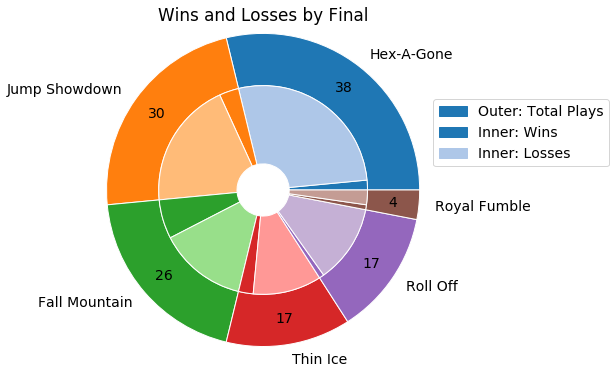

In [17]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,63,63,0
round_gauntlet_04,45,45,0
round_see_saw,43,43,0
round_gauntlet_01,40,38,2
round_gauntlet_02,32,31,1
round_gauntlet_05,32,32,0
round_door_dash,30,29,1
round_gauntlet_03,26,26,0
round_chompchomp,26,25,1
round_tunnel_race,21,20,1


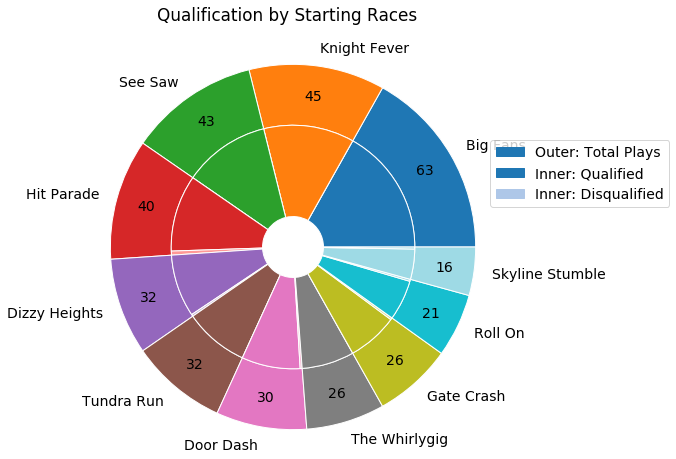

In [18]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

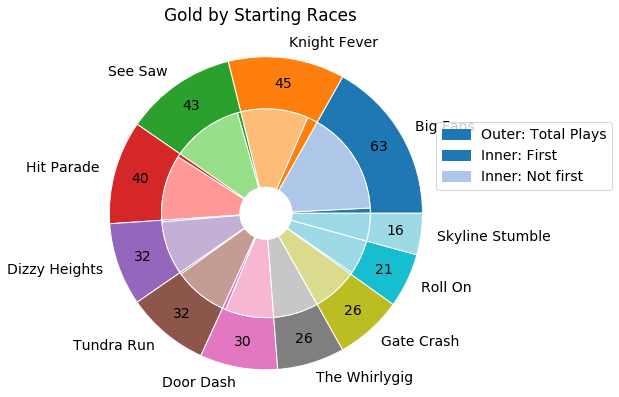

In [19]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

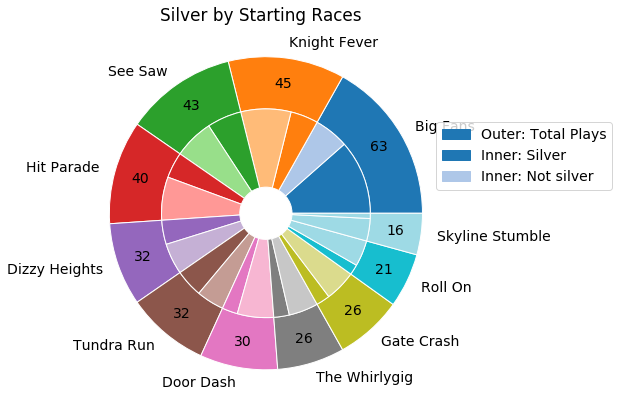

In [20]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

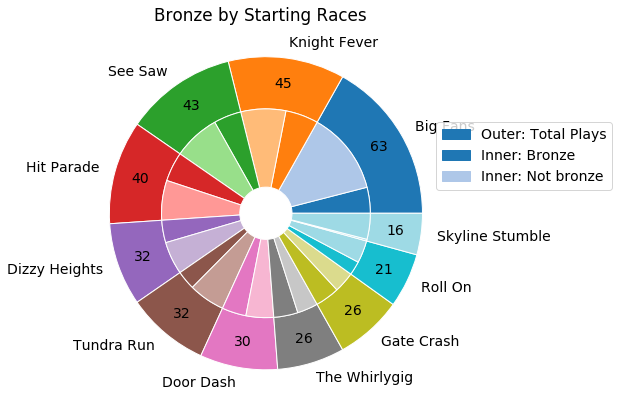

In [21]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

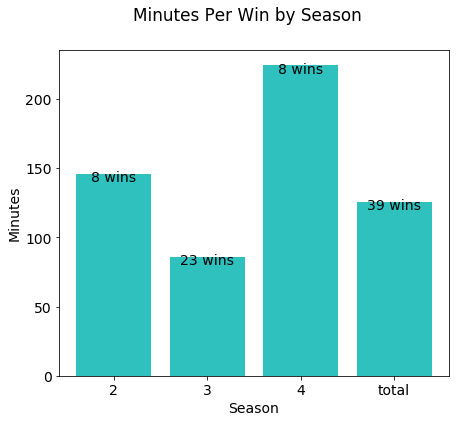

In [22]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

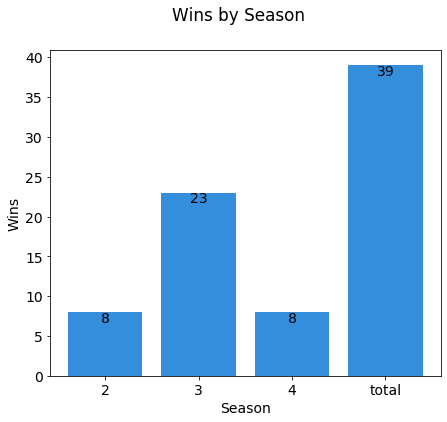

In [23]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [24]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75], [397, 398, 399], [680, 681]]

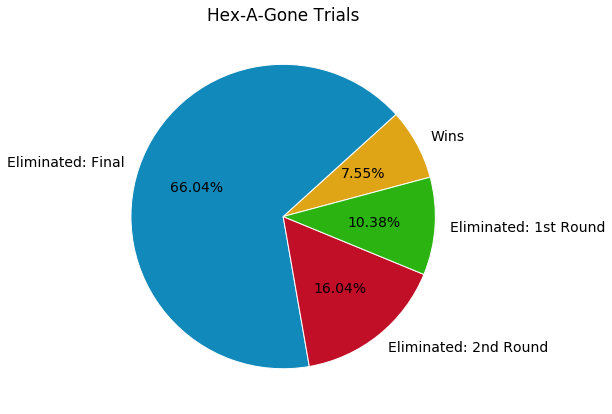

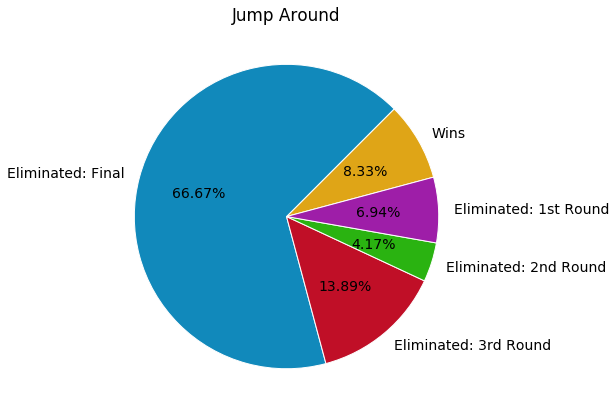

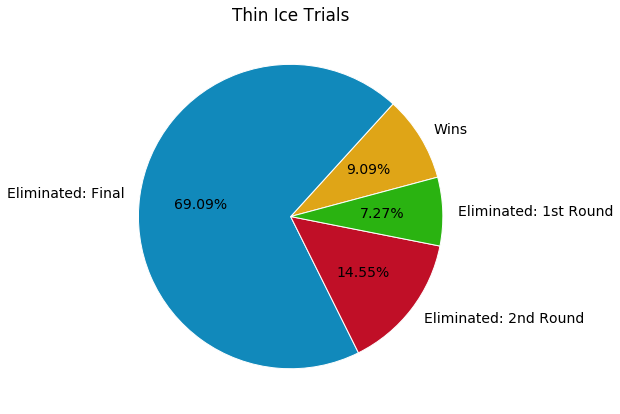

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)

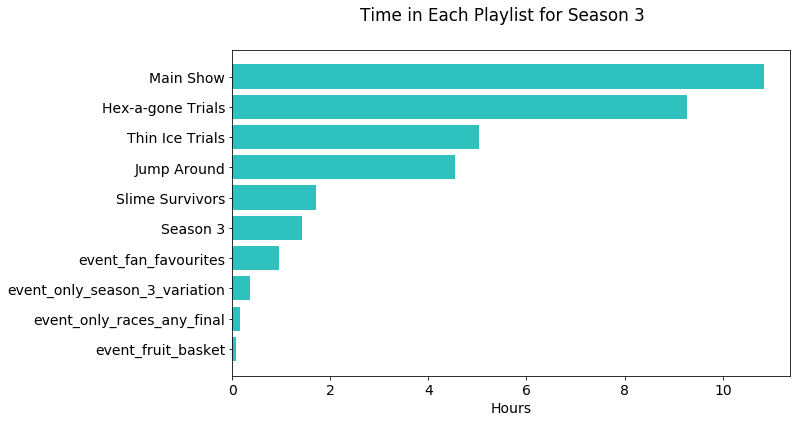

In [26]:
# Get a bar chart for playlist playtime for a season
fgv.seasonPlaylistTimeBar(shows_df, 3, True)

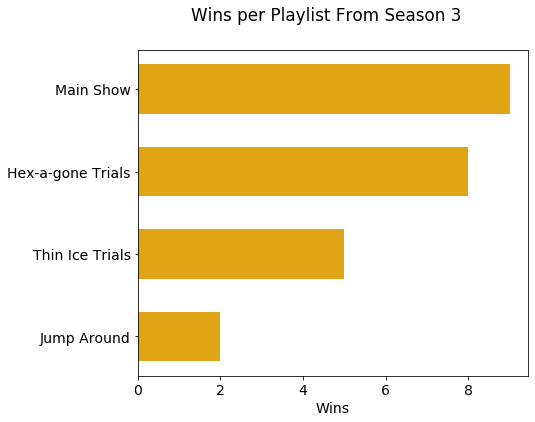

In [27]:
# Get a bar chart for wins per playlist from a season
fgv.seasonPlaylistWinsBar(shows_df, season=3)

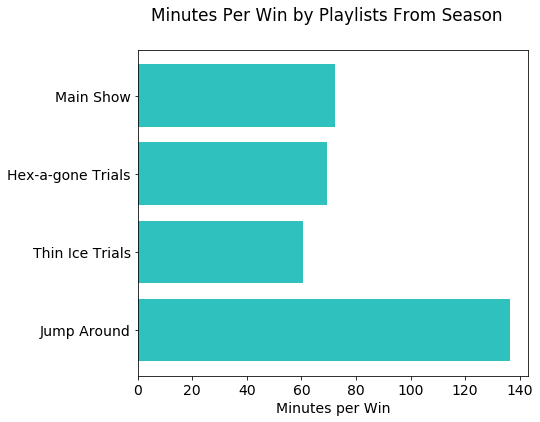

In [28]:
# Get a bar chart for minutes per win per playlist from a season
fgv.seasonPlaylistMinutesPerWinBar(shows_df, season=3)

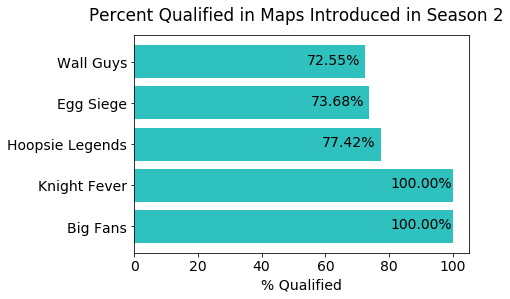

In [29]:
# Get a bar chart for percent qualified for maps introducted in a season
fgv.seasonMapsQualPercentBar(maps_df, season=2)

# side by side bars with attempts and times qualified?

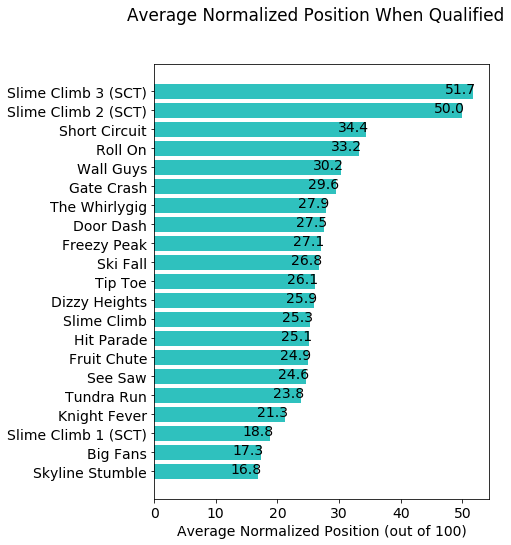

In [30]:
# Get a bar chart for average normalized position for race rounds when qualified
fgv.normalizedPositionRaceBar(maps_df)

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:419: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


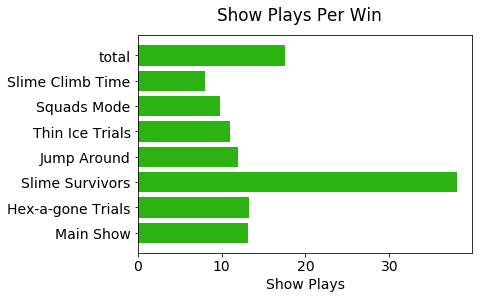

In [31]:
# Get a bar chart for plays per win for each playlist in a season (or overall)
fgv.playsPerWinPlaylistBar(shows_df, rounds_df, season=None, shorten=True)

0.4117647058823529

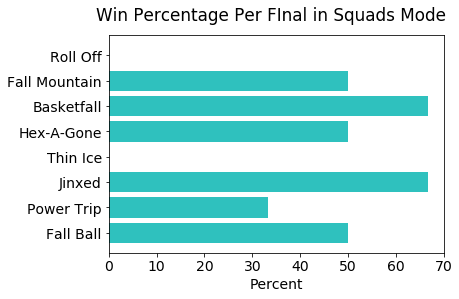

In [32]:
# Get a bar chart for win percentage in each final in Squads Mode
fgv.squadsFinalWinPercentBar(squad_shows_df, squad_rounds_df)

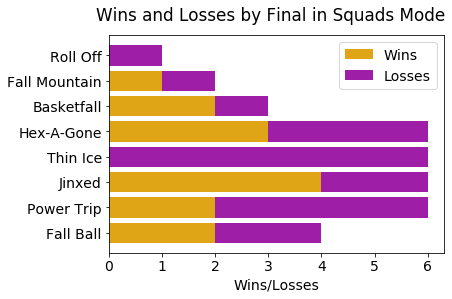

In [33]:
# Get a stacked bar plot for wins and fails per final in Squads Mode
fgv.squadsFinalStackedBar(squad_shows_df, squad_rounds_df)

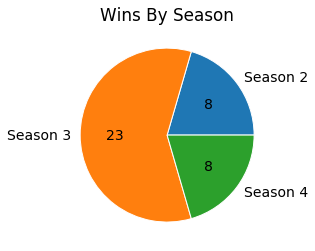

In [34]:
# Get a pie chart for normal wins by season
fgv.winsBySeasonPie(shows_df);